In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("C:/Users/yash/Downloads/Assignment - Junior Data Analyst.csv")
df

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot
...,...,...,...,...,...,...,...,...,...,...
979,2000 mAh Battery,5MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) FWVGA Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 MB,"Micromax Bharat 4 (Black, 8 GB)",3590,12 Months Brand Warranty,3.8,105 Reviews,NaN
980,2680 mAh Li-Ion Battery,13MP Rear Camera | 5MP Front Camera,13.21 cm (5.2 inch) Full HD Display,3 GB RAM | 32 GB ROM,"Nextbit Robin (Ember, 32 GB)",19999,Qualcomm Snapdragon 808 MSM8992 Processor,4.0,516 Reviews,Brand Warranty of 1 Year
981,4550 mAh Battery,13MP + 5MP | 20MP Front Camera,15.24 cm (6 inch) Full HD Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,"Gionee A1 Plus (Mocha Gold, 64 GB)",10499,Helio P25 MT 6757CD Processor,4.1,710 Reviews,Brand Warranty of 1 Year Available for Mobile ...
982,2100 mAh Li-Ion Battery,8MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) HD Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 GB,"XOLO Omega 5.0 (Black, 8 GB)",8990,MTK 6592M Processor,3.8,81 Reviews,1 Year Manufacturer Warranty


In [8]:
df.describe()

,price,rating
count,984.000000,971.000000
mean,15429.848577,4.241195
std,12891.355967,0.300296
min,887.000000,2.700000
25%,7499.000000,4.100000
50%,11649.000000,4.300000
75%,17999.250000,4.400000
max,104999.000000,4.900000


In [7]:
df['battery'] = df['battery'].replace(r'\D+', '' , regex=True)
df['reviews'] = df['reviews'].str.replace(r'\D+', '' , regex=True).replace('', 0)

In [9]:
import re
def fix_col(val):
    val = val.split("|")
    for i in range(len(val)):
        val[i]=re.sub("\D","",val[i])
    a =",".join(val)
    return a

In [10]:
print(df['memory'][:10])
df['memory'] = df['memory'].apply(fix_col)
df['memory'][:10]

0    4 GB RAM | 64 GB ROM | Expandable Upto 512 GB
1                             4 GB RAM | 64 GB ROM
2                            4 GB RAM | 128 GB ROM
3                            4 GB RAM | 128 GB ROM
4    3 GB RAM | 32 GB ROM | Expandable Upto 256 GB
5    3 GB RAM | 32 GB ROM | Expandable Upto 256 GB
6    2 GB RAM | 32 GB ROM | Expandable Upto 256 GB
7    3 GB RAM | 32 GB ROM | Expandable Upto 256 GB
8                             4 GB RAM | 64 GB ROM
9    3 GB RAM | 32 GB ROM | Expandable Upto 256 GB
Name: memory, dtype: object


0    4,64,512
1        4,64
2       4,128
3       4,128
4    3,32,256
5    3,32,256
6    2,32,256
7    3,32,256
8        4,64
9    3,32,256
Name: memory, dtype: object

In [11]:
print(df['camera'][:10])
df['camera'] = df['camera'].str.replace(r'[^\d+|]', '' , regex=True)
df['camera'][:10]

0                12MP + 2MP | 8MP Front Camera
1    12MP + 8MP + 2MP + 2MP | 8MP Front Camera
2    12MP + 8MP + 2MP + 2MP | 8MP Front Camera
3    12MP + 8MP + 2MP + 2MP | 8MP Front Camera
4                13MP + 2MP | 5MP Front Camera
5                13MP + 2MP | 5MP Front Camera
6                13MP + 2MP | 5MP Front Camera
7                13MP + 2MP | 5MP Front Camera
8    12MP + 8MP + 2MP + 2MP | 8MP Front Camera
9                13MP + 2MP | 5MP Front Camera
Name: camera, dtype: object


0        12+2|8
1    12+8+2+2|8
2    12+8+2+2|8
3    12+8+2+2|8
4        13+2|5
5        13+2|5
6        13+2|5
7        13+2|5
8    12+8+2+2|8
9        13+2|5
Name: camera, dtype: object

In [12]:
df['memory'][:10]

0    4,64,512
1        4,64
2       4,128
3       4,128
4    3,32,256
5    3,32,256
6    2,32,256
7    3,32,256
8        4,64
9    3,32,256
Name: memory, dtype: object

In [13]:
import re
def fix_display(text):
    return re.sub('(.+?) cm \((.+?) inch\) (Full\s)?(HD\+) Display', '\\2-\\3\\4', text)

fix_display('16.94 cm (6.67 inch) Full HD+ Display')

'6.67-Full HD+'

In [224]:
df['display']= df['display'].apply(fix_display)
df['display'][:10]

0    6.22-HD+
1    6.52-HD+
2    6.52-HD+
3    6.52-HD+
4     6.1-HD+
5     6.1-HD+
6     6.1-HD+
7     6.1-HD+
8    6.52-HD+
9     6.1-HD+
Name: display, dtype: object

In [14]:
df['name']=df.name.str.split('(').str.get(0)
df['name'][:10]

0      Redmi 8 
1    Realme 5i 
2    Realme 5i 
3    Realme 5i 
4    Realme C2 
5    Realme C2 
6    Realme C2 
7    Realme C2 
8    Realme 5i 
9    Realme C2 
Name: name, dtype: object

In [15]:
df['warranty'] = 1
df['warranty'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: warranty, dtype: int64

In [16]:
df[:10]

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000,12+2|8,15.8 cm (6.22 inch) HD+ Display,"4,64,512",Redmi 8,9999,Qualcomm Snapdragon 439 Processor,4.4,55078,1
1,5000,12+8+2+2|8,16.56 cm (6.52 inch) HD+ Display,"4,64",Realme 5i,10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,20062,1
2,5000,12+8+2+2|8,16.56 cm (6.52 inch) HD+ Display,"4,128",Realme 5i,11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,20062,1
3,5000,12+8+2+2|8,16.56 cm (6.52 inch) HD+ Display,"4,128",Realme 5i,11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,20062,1
4,4000,13+2|5,15.49 cm (6.1 inch) HD+ Display,"3,32,256",Realme C2,7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,10091,1
5,4000,13+2|5,15.49 cm (6.1 inch) HD+ Display,"3,32,256",Realme C2,7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,10091,1
6,4000,13+2|5,15.49 cm (6.1 inch) HD+ Display,"2,32,256",Realme C2,6999,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,67674,1
7,4000,13+2|5,15.49 cm (6.1 inch) HD+ Display,"3,32,256",Realme C2,7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,10091,1
8,5000,12+8+2+2|8,16.56 cm (6.52 inch) HD+ Display,"4,64",Realme 5i,10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,20062,1
9,4000,13+2|5,15.49 cm (6.1 inch) HD+ Display,"3,32,256",Realme C2,7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,10091,1


In [17]:
print(f'name: {df.price.count()}')
print(f'name: {df.price.mean()}')
print(f'name: {df.price.std()}')
print(f'name: {df.price.min()}')
print(f'name: {df.price.max()}')

name: 984
name: 15429.848577235773
name: 12891.355966837673
name: 887
name: 104999


battery


C:\Users\yash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


camera


C:\Users\yash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


display


C:\Users\yash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


memory


C:\Users\yash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


name


C:\Users\yash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


price
processor


C:\Users\yash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


rating
reviews


C:\Users\yash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


warranty


C:\Users\yash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


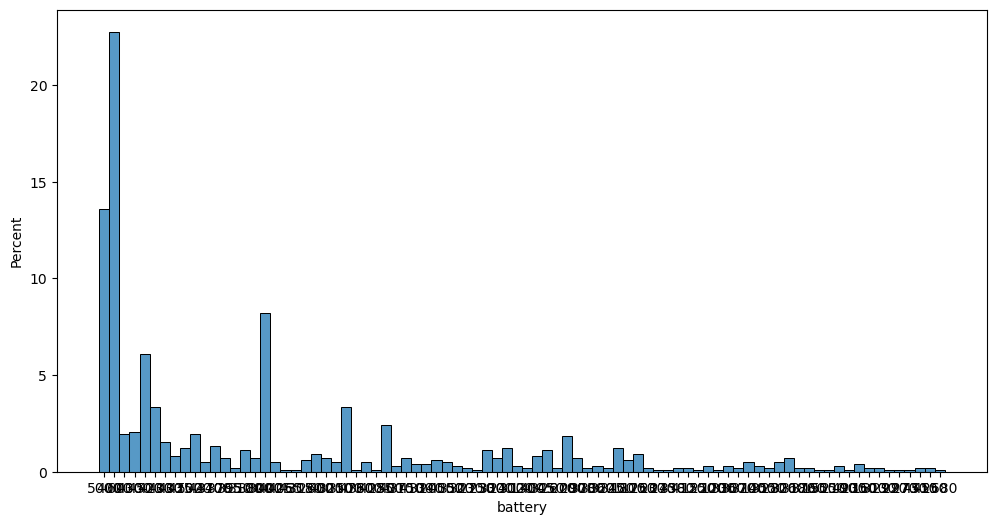

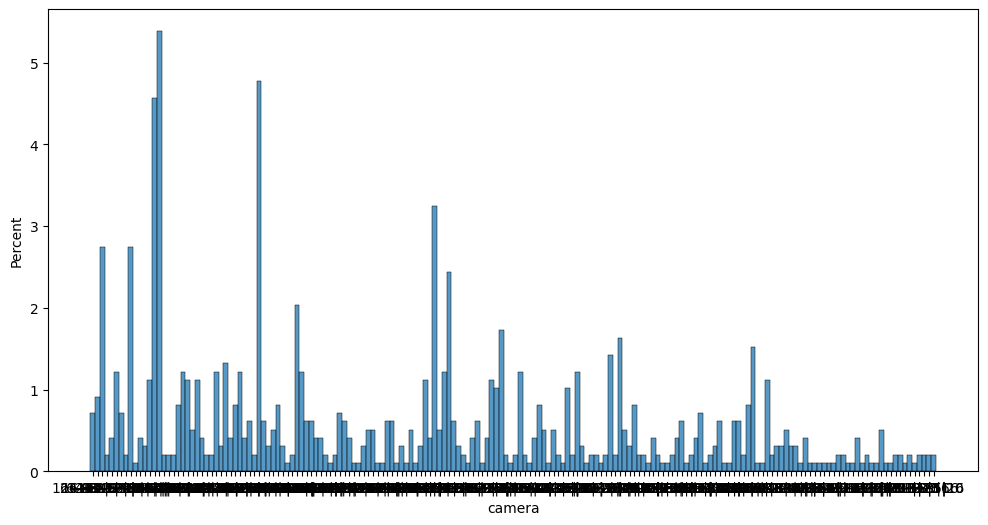

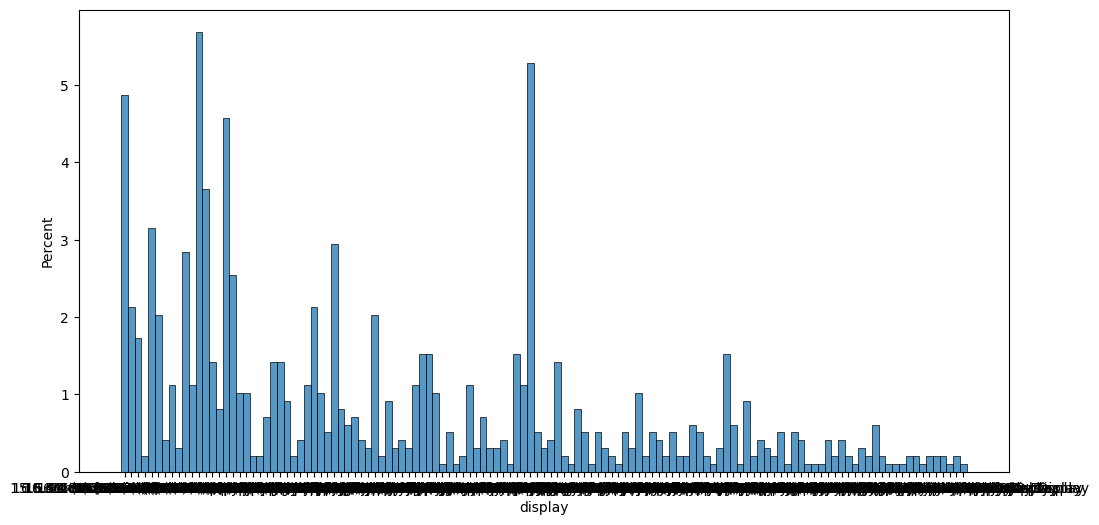

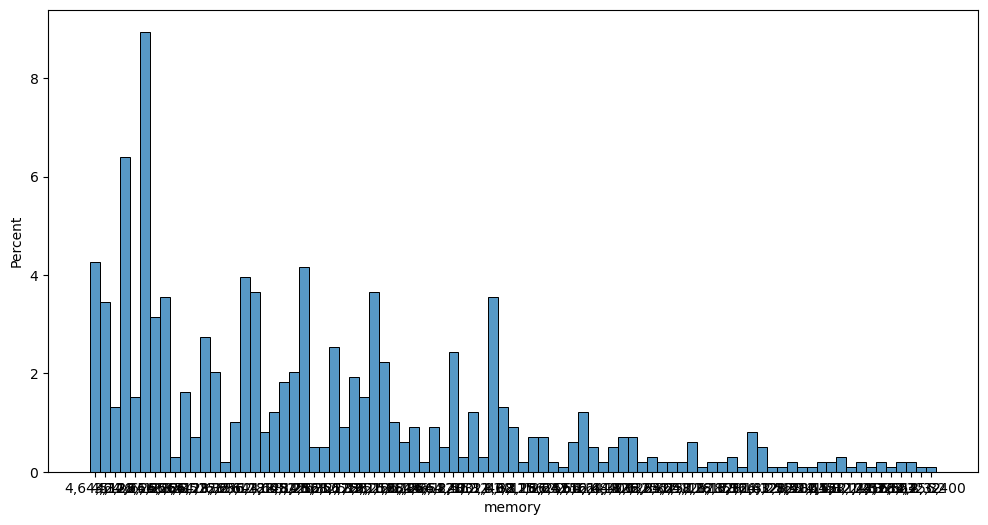

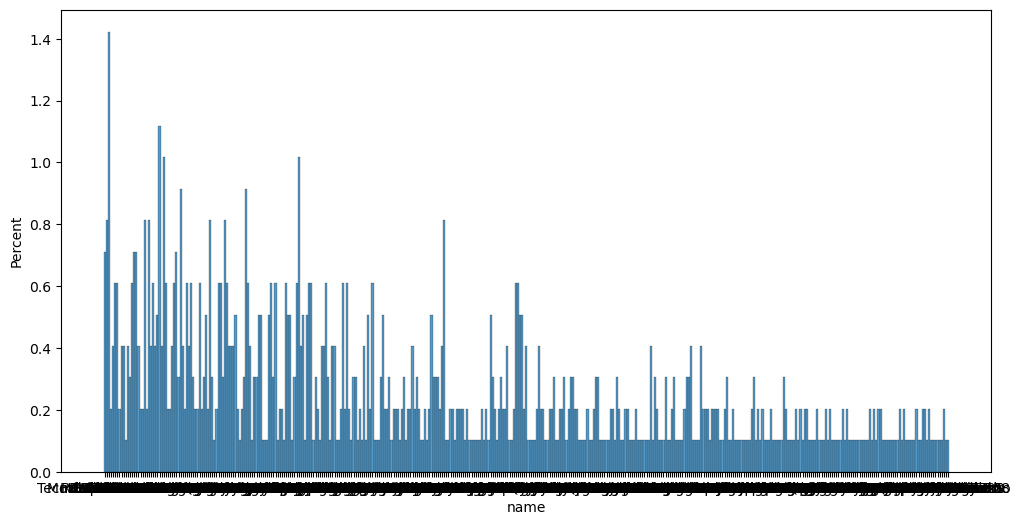

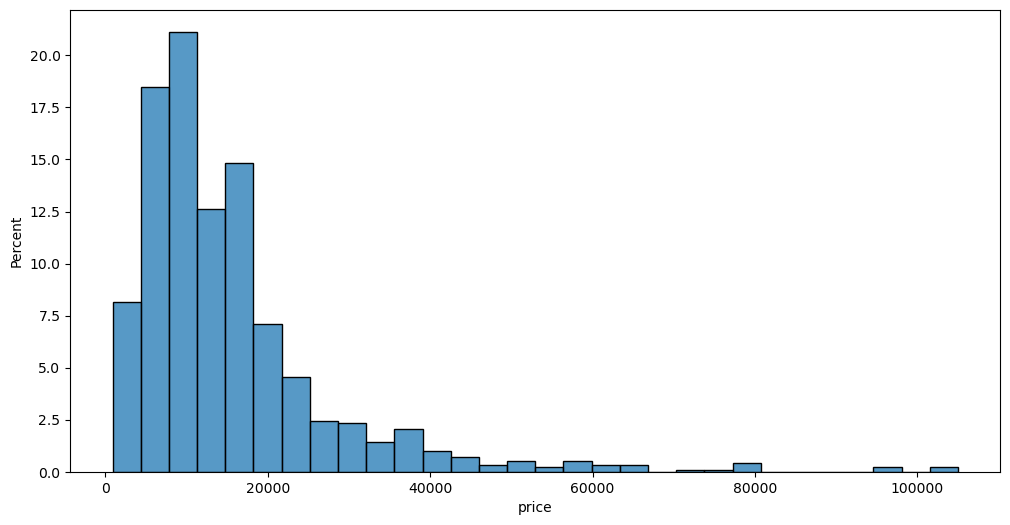

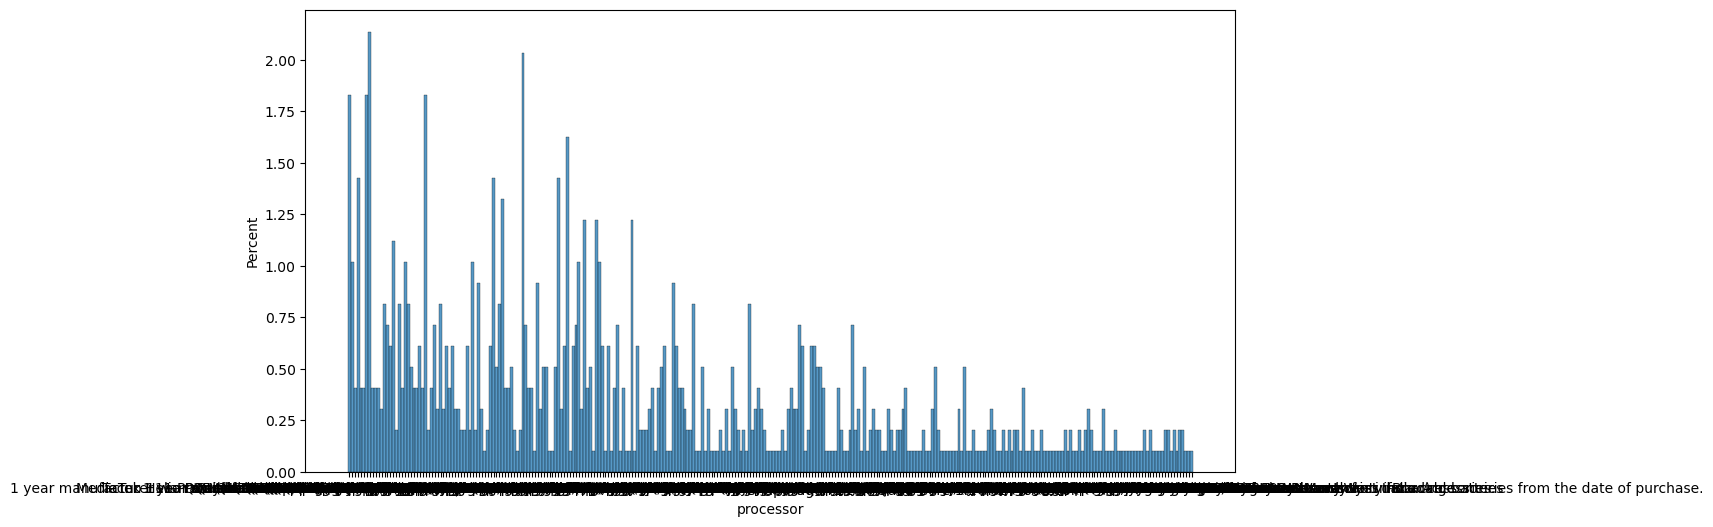

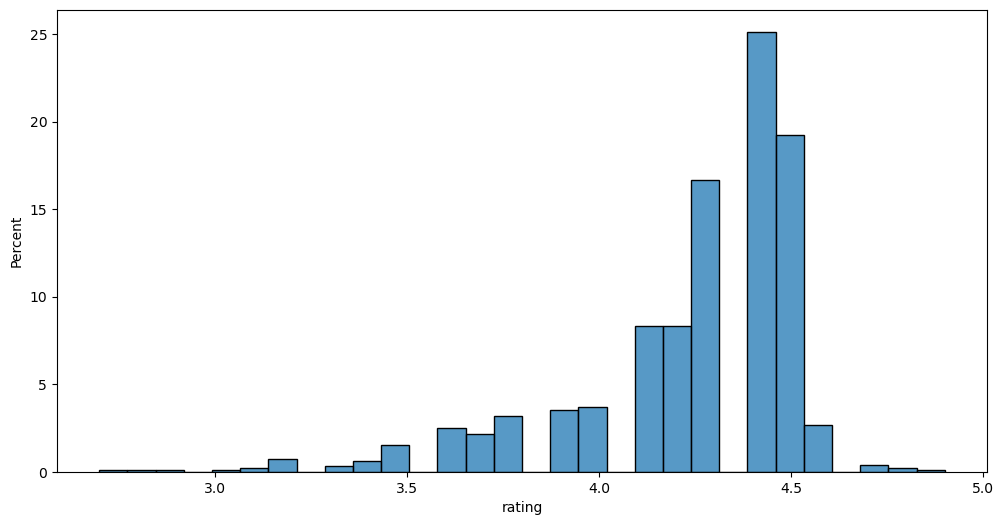

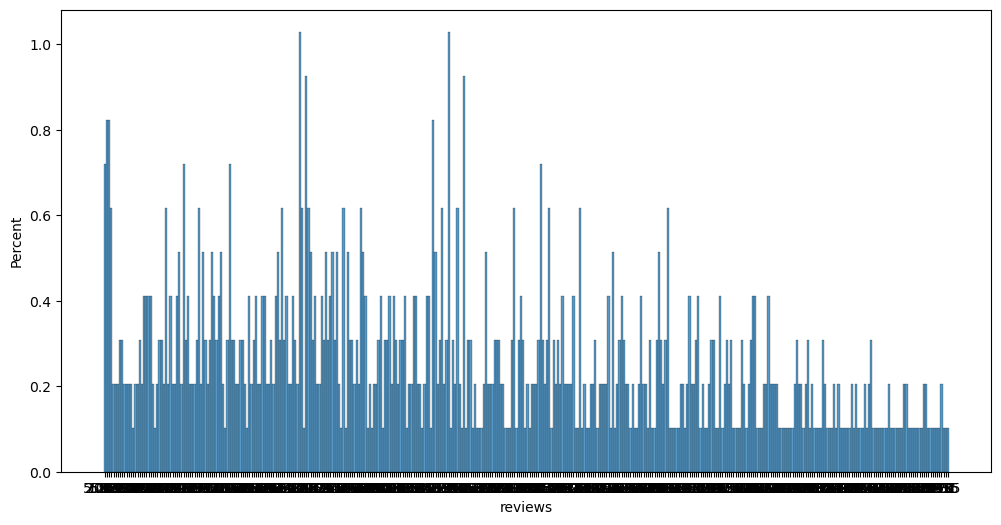

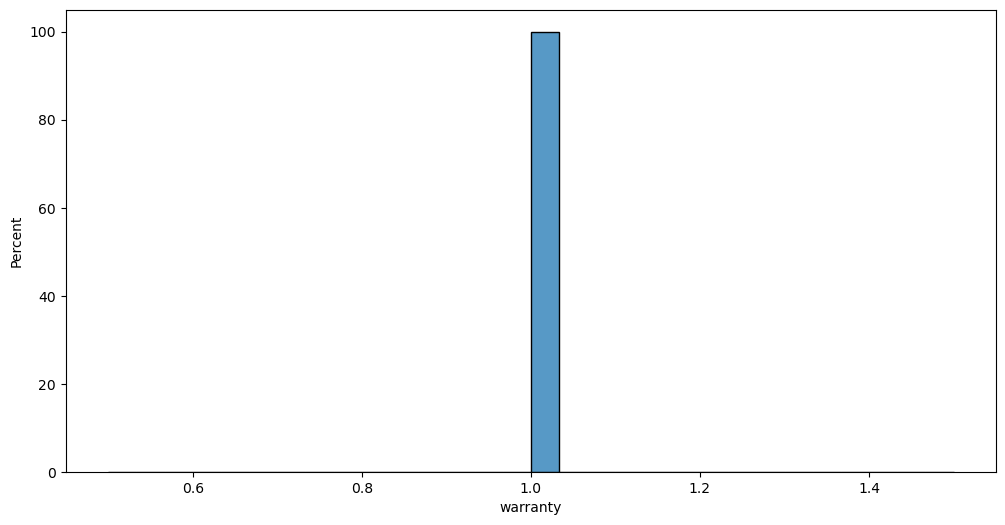

In [18]:
for i, column in enumerate(df.columns):
    print(column)
    plt.figure(i, figsize=(12,6))
    sns.histplot(df[column], bins=30, stat='percent', kde=False) 

C:\Users\yash\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

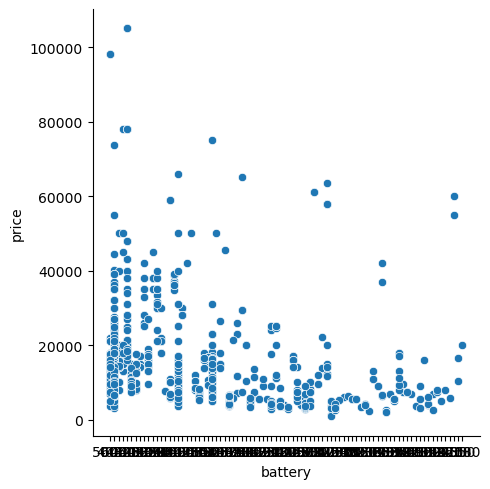

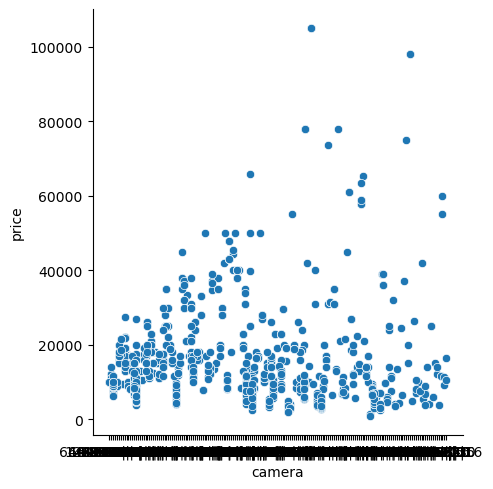

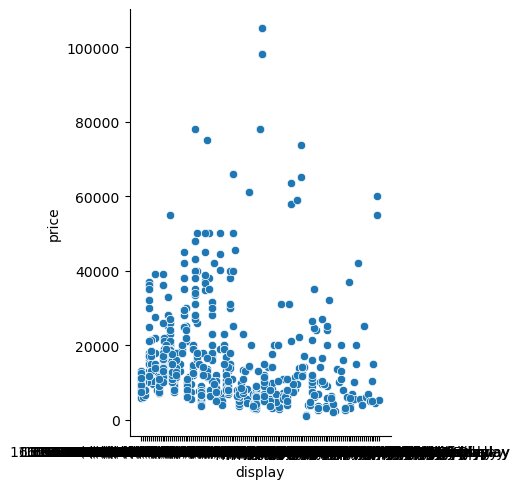

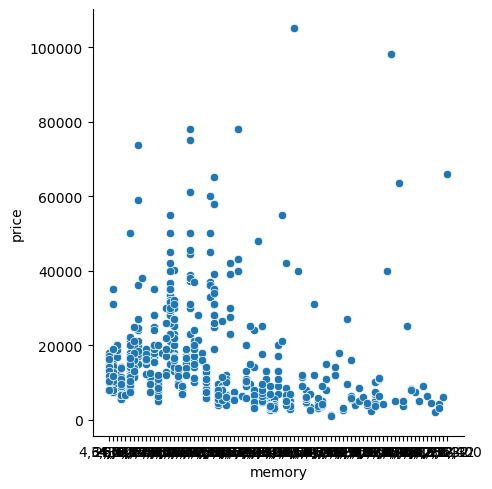

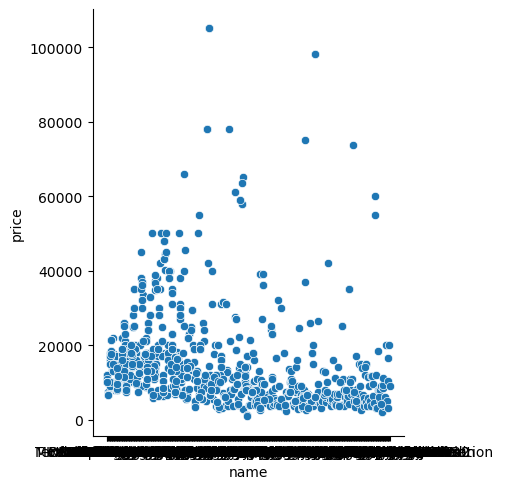

<Figure size 1200x600 with 0 Axes>

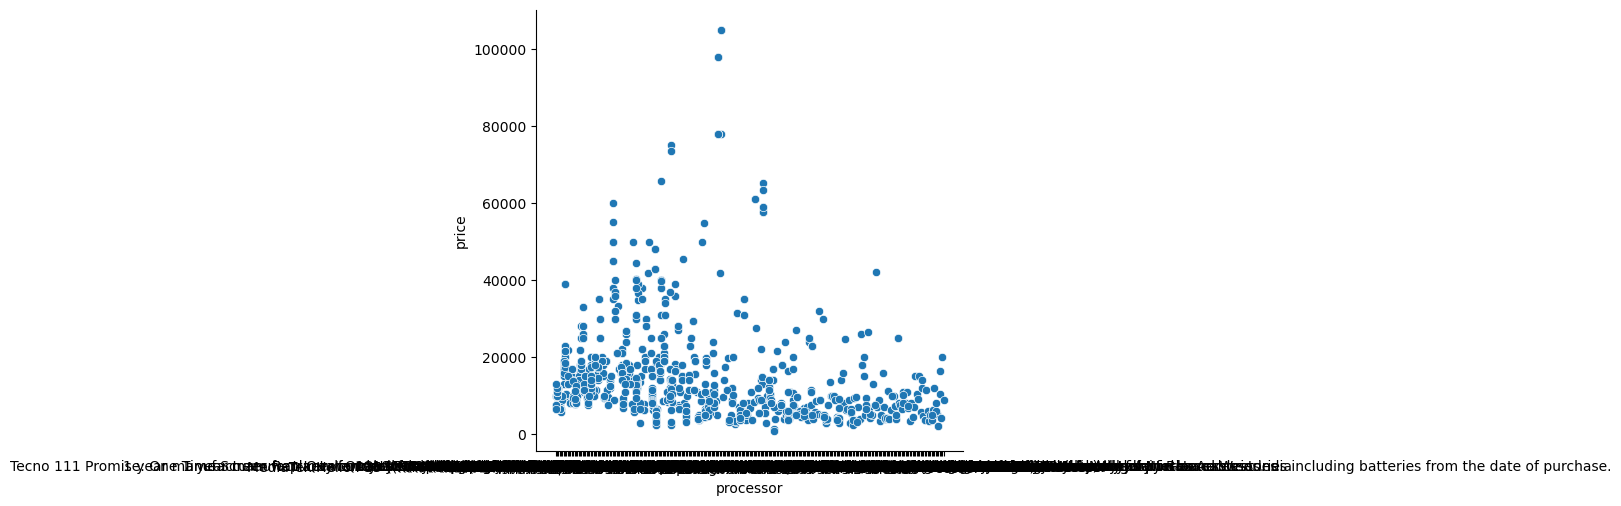

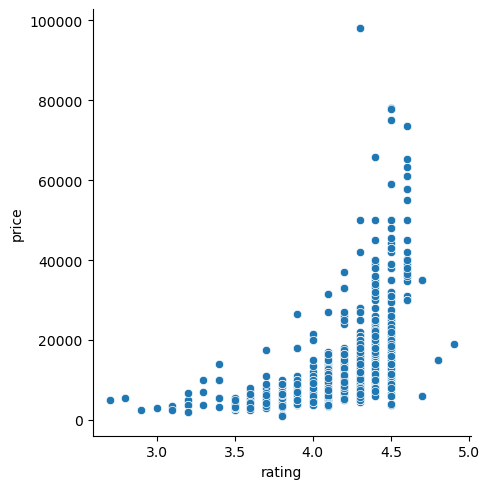

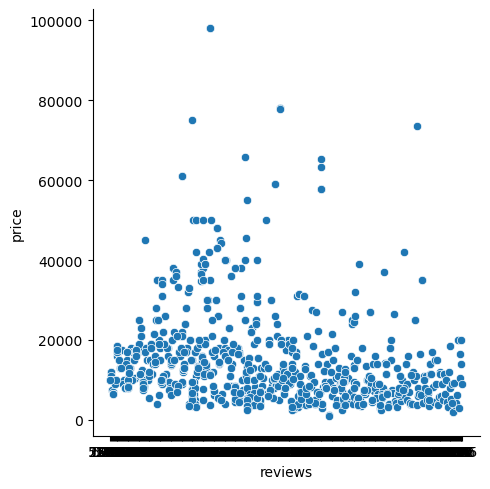

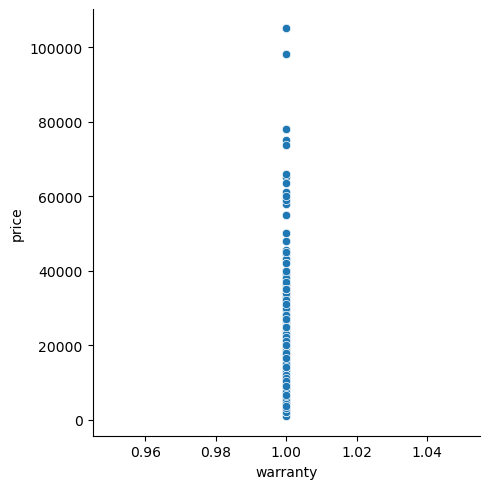

In [19]:
# price campare
for i, column in enumerate(df.columns):
    if column == 'price':
        continue
    plt.figure(i, figsize=(12,6))
    sns.relplot(data=df, x=column, y='price')

battery
camera
display
memory
name
price
processor


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


rating
reviews
warranty


<Figure size 1200x600 with 0 Axes>

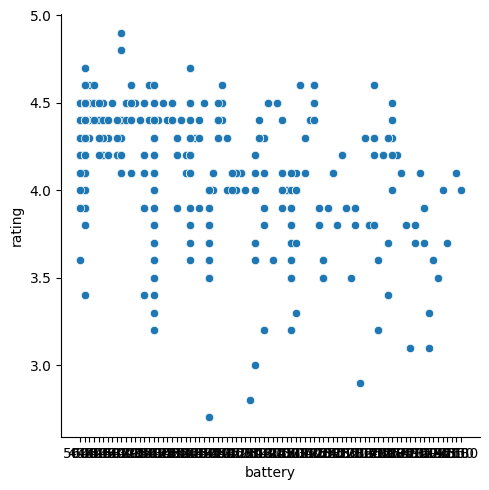

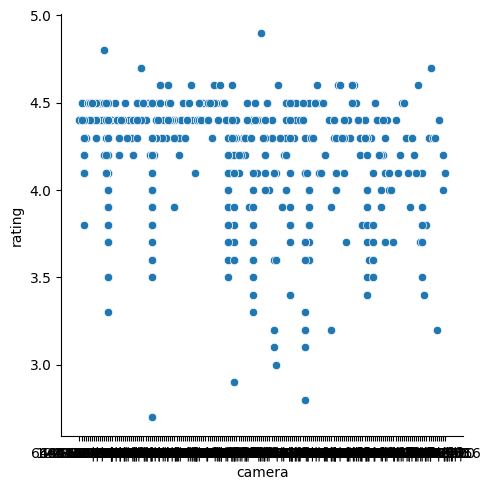

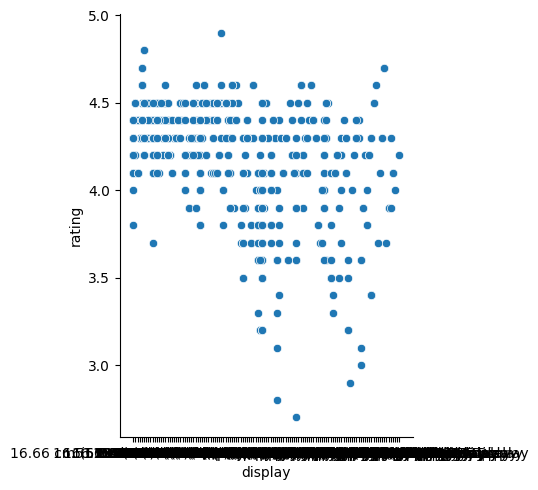

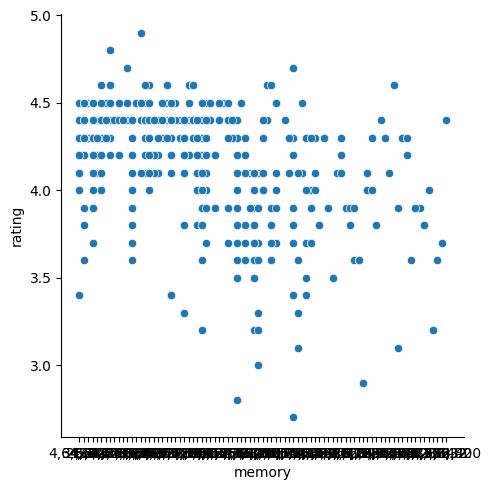

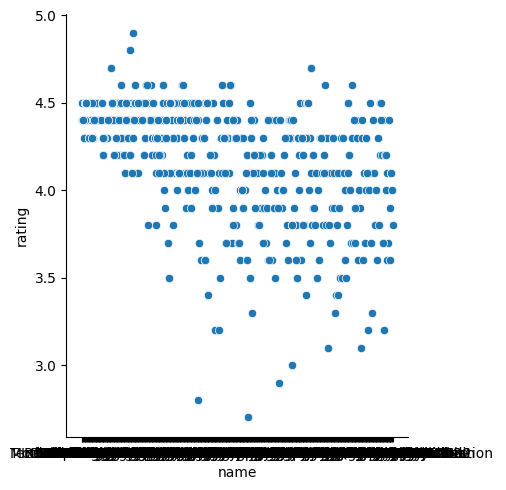

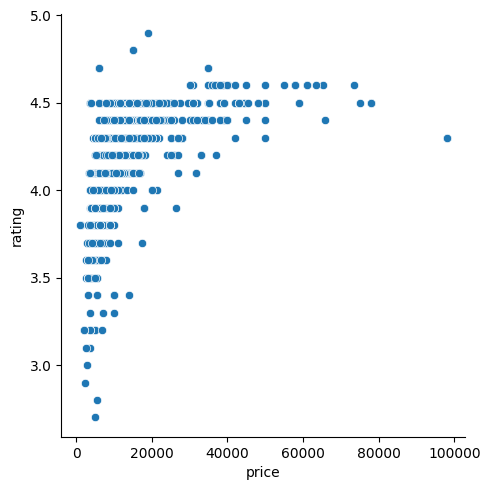

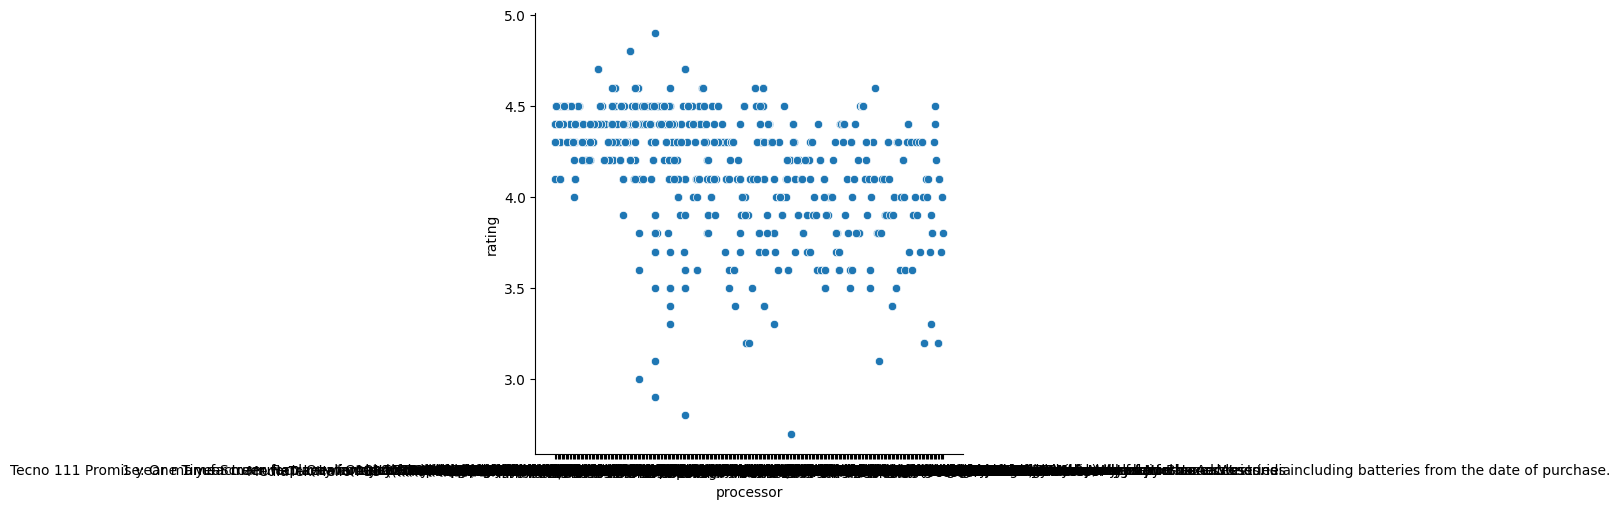

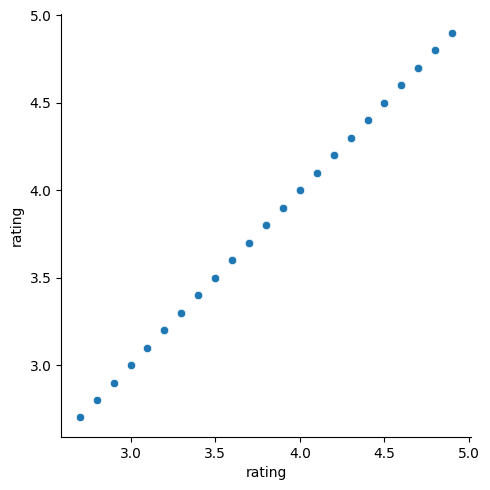

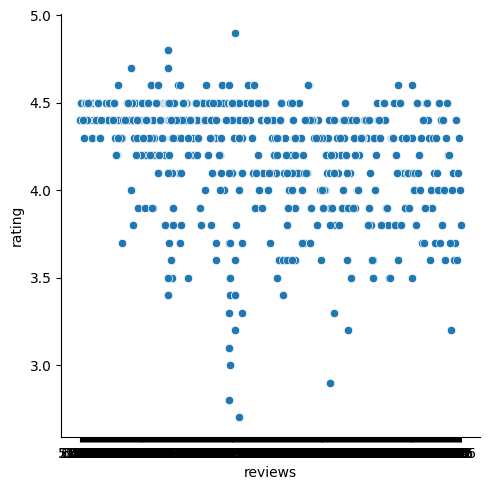

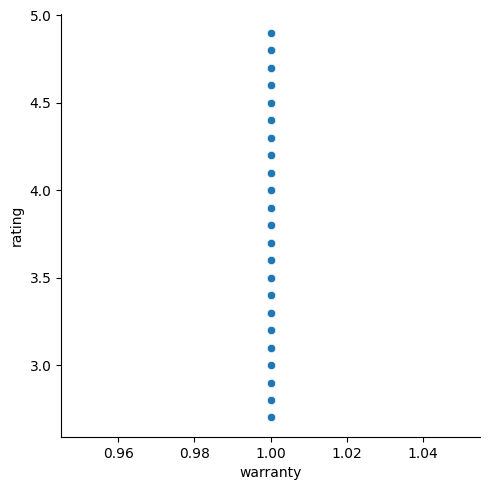

In [231]:
# rating campare
for i, column in enumerate(df.columns):
    print(column)
    plt.figure(i, figsize=(12,6))
    sns.relplot(data=df, x=column, y='rating')

Correlation of 'price' with other features:
price      1.000000
rating     0.469329
battery    0.288851
reviews   -0.123178
Name: price, dtype: float64


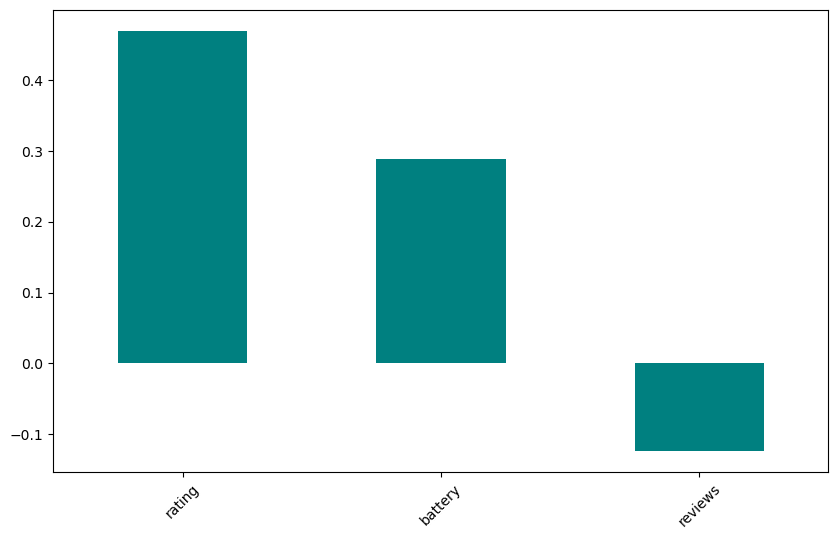

In [22]:
correlation_matrix = df[['battery','price','rating','reviews']].corr()
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("Correlation of 'price' with other features:")
print(price_correlations)

plt.figure(figsize=(10, 6))
price_correlations.drop('price').plot(kind='bar', color='teal')
plt.title=('Correlation')
plt.xlabel=('Features')
plt.ylabel=('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

C:\Users\yash\AppData\Local\Temp\ipykernel_18828\2406039181.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='price', y='rating', palette='viridis', alpha=1)


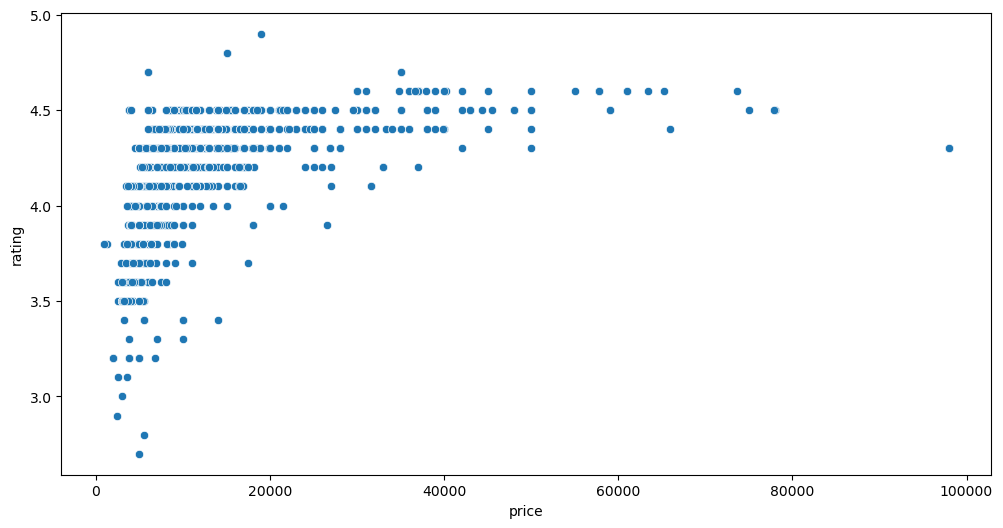

In [42]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='price', y='rating', palette='viridis', alpha=1)
plt.title=('Scatter Plot of Price vs. Rating')
plt.xlabel=('Price')
plt.ylabel=('Rating')
plt.show()

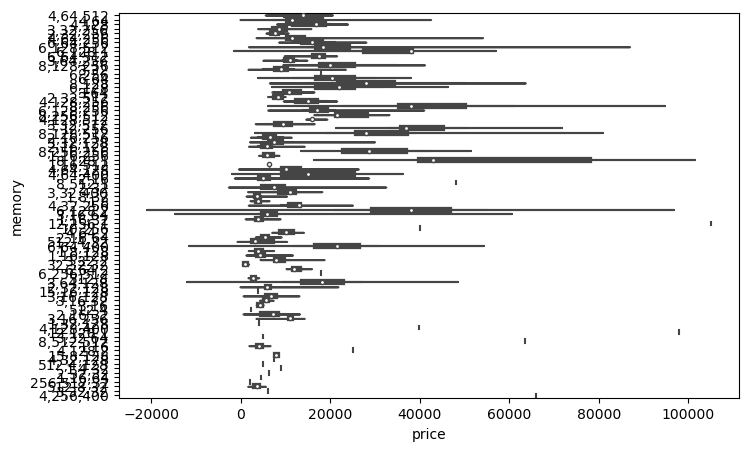

In [47]:
#Distribution of Features like Memory, Camera, Processor:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='price', y='memory')
plt.title=('Violin Plot of Memory vs. Price')
plt.xlabel=('Memory')
plt.ylabel=('Price')
plt.show()

In [51]:
categorical_columns = ['battery', 'camera', 'display', 'memory', 'name', 'processor', 'warranty']
for col in categorical_columns:
    df[col] = pd.factorize(df[col])[0]

In [54]:
features = ['price', 'rating', 'reviews', 'battery', 'camera', 'display', 'memory', 'processor', 'warranty']
X = df[features]

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
df

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,0,0,0,0,0,9999,0,4.4,55078,0
1,0,1,1,1,1,10999,1,4.5,20062,0
2,0,1,1,2,1,11999,2,4.5,20062,0
3,0,1,1,2,1,11999,2,4.5,20062,0
4,1,2,2,3,2,7499,3,4.4,10091,0
...,...,...,...,...,...,...,...,...,...,...
979,46,111,58,40,328,3590,207,3.8,105,0
980,83,14,97,12,399,19999,286,4.0,516,0
981,82,177,94,5,398,10499,284,4.1,710,0
982,73,166,60,40,400,8990,287,3.8,81,0


ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

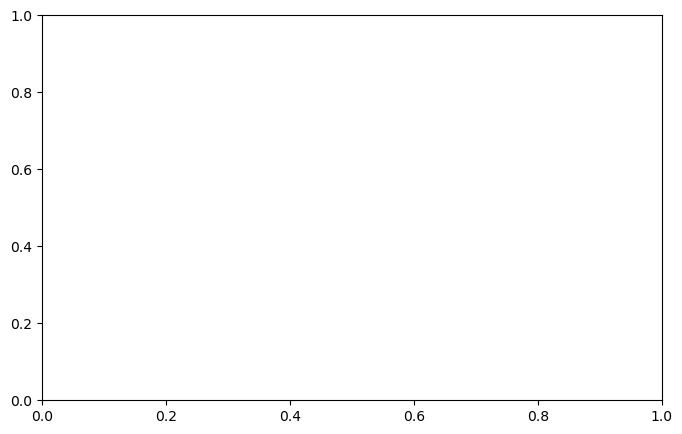

In [91]:
wcss = [] 
from sklearn.cluster import KMeans
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()
 